In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

import descartes
from shapely.geometry import Point, Polygon
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


/kaggle/input/temperature-us-counties-over-time/2017.csv
/kaggle/input/temperature-us-counties-over-time/1997.csv
/kaggle/input/temperature-us-counties-over-time/2007.csv
/kaggle/input/precipitation-2017/110-pcp-201701-12.csv
/kaggle/input/agriculture-1997/0DC9D74F-8FA1-322A-98AC-054BC9D033DD.csv
/kaggle/input/us-county/USA_Counties.shp
/kaggle/input/us-county/USA_Counties.cpg
/kaggle/input/us-county/USA_Counties.prj
/kaggle/input/us-county/USA_Counties.dbf
/kaggle/input/us-county/USA_Counties.shx
/kaggle/input/precipitation-2007/110-pcp-200701-12.csv
/kaggle/input/agriculture-2017/80575AFB-6EC9-378B-AC88-81D5379D64D7.csv
/kaggle/input/precipitation-1997/110-pcp-199701-12.csv
/kaggle/input/agricultural-data-2007/DE8163F1-9E0F-3CAF-A85A-161294F1AB40.csv
/kaggle/input/precipitation-data-for-counties-in-7-areas-in-us/PNW.csv
/kaggle/input/precipitation-data-for-counties-in-7-areas-in-us/Four Corners.csv
/kaggle/input/precipitation-data-for-counties-in-7-areas-in-us/Great Lakes.csv
/kaggle

# Data Cleaning

In [2]:
geographic = gpd.read_file("/kaggle/input/us-county/USA_Counties.shp")


In [3]:
geographic.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NAME        3221 non-null   object  
 1   STATE_NAME  3221 non-null   object  
 2   POP2010     3221 non-null   int64   
 3   POP10_SQMI  3221 non-null   float64 
 4   POP2012     3221 non-null   int64   
 5   POP12_SQMI  3221 non-null   float64 
 6   WHITE       3221 non-null   int64   
 7   BLACK       3221 non-null   int64   
 8   AMERI_ES    3221 non-null   int64   
 9   ASIAN       3221 non-null   int64   
 10  HAWN_PI     3221 non-null   int64   
 11  HISPANIC    3221 non-null   int64   
 12  OTHER       3221 non-null   int64   
 13  MULT_RACE   3221 non-null   int64   
 14  MALES       3221 non-null   int64   
 15  FEMALES     3221 non-null   int64   
 16  AGE_UNDER5  3221 non-null   int64   
 17  AGE_5_9     3221 non-null   int64   
 18  AGE_10_14   3221 non-null   int64   
 19

Additional feautures such as demographic information were considered at an initial running of this notebook, however it increased the Error. Thus, it was removed. 

In [4]:
geographic = geographic[['NAME','STATE_NAME','geometry']]
geographic

,NAME,STATE_NAME,geometry
0,Graham,Arizona,"MULTIPOLYGON (((-12217131.319 3959728.262, -12..."
1,Greenlee,Arizona,"POLYGON ((-12139871.371 3999069.283, -12139050..."
2,Bureau,Illinois,"POLYGON ((-9925971.867 5099065.657, -9925971.4..."
3,La Paz,Arizona,"MULTIPOLYGON (((-12720330.271 3924275.838, -12..."
4,Calhoun,Illinois,"POLYGON ((-10116327.032 4779103.377, -10116308..."
...,...,...,...
3216,Vega Baja,Puerto Rico,"MULTIPOLYGON (((-7389092.135 2095082.949, -738..."
3217,Vieques,Puerto Rico,"POLYGON ((-7287931.984 2048045.066, -7287936.3..."
3218,Villalba,Puerto Rico,"POLYGON ((-7398679.094 2058408.740, -7398662.7..."
3219,Yabucoa,Puerto Rico,"MULTIPOLYGON (((-7324309.318 2045566.508, -732..."


In [5]:
precip_2017 = pd.read_csv("/kaggle/input/precipitation-2017/110-pcp-201701-12.csv")
agric_2017 = pd.read_csv("/kaggle/input/agriculture-2017/80575AFB-6EC9-378B-AC88-81D5379D64D7.csv")
temp_2017 = pd.read_csv("/kaggle/input/temperature-us-counties-over-time/2017.csv")

precip_2007 = pd.read_csv("/kaggle/input/precipitation-2007/110-pcp-200701-12.csv")
agric_2007 = pd.read_csv ("/kaggle/input/agricultural-data-2007/DE8163F1-9E0F-3CAF-A85A-161294F1AB40.csv")
temp_2007 = pd.read_csv("/kaggle/input/temperature-us-counties-over-time/2007.csv")

precip_1997 = pd.read_csv("/kaggle/input/precipitation-1997/110-pcp-199701-12.csv")
agric_1997 = pd.read_csv("/kaggle/input/agriculture-1997/0DC9D74F-8FA1-322A-98AC-054BC9D033DD.csv")
temp_1997 = pd.read_csv("/kaggle/input/temperature-us-counties-over-time/1997.csv")

In [6]:
precip_2017[['State','ID']] = precip_2017['Location ID'].str.split('-',expand=True)
precip_2007[['State','ID']] = precip_2007['Location ID'].str.split('-',expand=True)
precip_1997[['State','ID']] = precip_1997['Location ID'].str.split('-',expand=True)

temp_2017[['State','ID']] = temp_2017['Location ID'].str.split('-',expand=True)
temp_2007[['State','ID']] = temp_2007['Location ID'].str.split('-',expand=True)
temp_1997[['State','ID']] = temp_1997['Location ID'].str.split('-',expand=True)

In [7]:
precip_2017.State.unique()
precip_2017 = precip_2017[precip_2017.State!="AK"]
precip_2007.State.unique()
precip_2007 = precip_2007[precip_2007.State!="AK"]
precip_1997.State.unique()
precip_1997 = precip_1997[precip_1997.State!="AK"]


temp_2017.State.unique()
temp_2017 = temp_2017[temp_2017.State!="AK"]
temp_2007.State.unique()
temp_2007 = temp_2007[temp_2007.State!="AK"]
temp_1997.State.unique()
temp_1997 = temp_1997[temp_1997.State!="AK"]

In [8]:
precip_2017['Location'] = precip_2017['Location'].str.split(' ',expand=True)[0]
precip_2017.drop(['Location ID','Rank','Anomaly (1901-2000 base period)','1901-2000 Mean'], axis=1,inplace=True)
precip_2017.rename(columns={'Value':'Precipitation (inches)'},inplace=True)

precip_2007['Location'] = precip_2007['Location'].str.split(' ',expand=True)[0]
precip_2007.drop(['Location ID','Rank','Anomaly (1901-2000 base period)','1901-2000 Mean'], axis=1,inplace=True)
precip_2007.rename(columns={'Value':'Precipitation (inches)'},inplace=True)

precip_1997['Location'] = precip_1997['Location'].str.split(' ',expand=True)[0]
precip_1997.drop(['Location ID','Rank','Anomaly (1901-2000 base period)','1901-2000 Mean'], axis=1,inplace=True)
precip_1997.rename(columns={'Value':'Precipitation (inches)'},inplace=True)

temp_2017['Location'] = temp_2017['Location'].str.split(' ',expand=True)[0]
temp_2017.drop(['Location ID','Rank','Anomaly (1901-2000 base period)','1901-2000 Mean'], axis=1,inplace=True)
temp_2017.rename(columns={'Value':'Temp (F)'},inplace=True)

temp_2007['Location'] = temp_2007['Location'].str.split(' ',expand=True)[0]
temp_2007.drop(['Location ID','Rank','Anomaly (1901-2000 base period)','1901-2000 Mean'], axis=1,inplace=True)
temp_2007.rename(columns={'Value':'Temp (F)'},inplace=True)

temp_1997['Location'] = temp_1997['Location'].str.split(' ',expand=True)[0]
temp_1997.drop(['Location ID','Rank','Anomaly (1901-2000 base period)','1901-2000 Mean'], axis=1,inplace=True)
temp_1997.rename(columns={'Value':'Temp (F)'},inplace=True)

In [9]:
agric_2017.head()
agric_2017.drop(["Program","Year","Period","Week Ending","Geo Level","County ANSI","State ANSI","Ag District","Ag District Code","Zip Code","Region","watershed_code","Watershed","Commodity","Domain","Domain Category", "CV (%)"],axis=1,inplace=True)
agric_2017_a = agric_2017[agric_2017['Data Item'] == "CROP TOTALS - SALES, MEASURED IN $"]
del agric_2017 
agric_2017 = agric_2017_a.copy()
agric_2017.drop(["Data Item"],axis=1,inplace=True)
agric_2017.rename(columns={'Value':'Total sales'},inplace=True)
agric_2017['County'] = agric_2017['County'].str.lower()

agric_2007.head()
agric_2007.drop(["Program","Year","Period","Week Ending","Geo Level","County ANSI","State ANSI","Ag District","Ag District Code","Zip Code","Region","watershed_code","Watershed","Commodity","Domain","Domain Category", "CV (%)"],axis=1,inplace=True)
agric_2007_a = agric_2007[agric_2007['Data Item'] == "CROP TOTALS - SALES, MEASURED IN $"]
del agric_2007 
agric_2007 = agric_2007_a.copy()
agric_2007.drop(["Data Item"],axis=1,inplace=True)
agric_2007.rename(columns={'Value':'Total sales'},inplace=True)
agric_2007['County'] = agric_2007['County'].str.lower()

agric_1997.head()
agric_1997.drop(["Program","Year","Period","Week Ending","Geo Level","County ANSI","State ANSI","Ag District","Ag District Code","Zip Code","Region","watershed_code","Watershed","Commodity","Domain","Domain Category", "CV (%)"],axis=1,inplace=True)
agric_1997_a = agric_1997[agric_1997['Data Item'] == "CROP TOTALS - SALES, MEASURED IN $"]
del agric_1997 
agric_1997 = agric_1997_a.copy()
agric_1997.drop(["Data Item"],axis=1,inplace=True)
agric_1997.rename(columns={'Value':'Total sales'},inplace=True)
agric_1997['County'] = agric_1997['County'].str.lower()

In [10]:
#geographic.drop(geographic.columns.difference(['NAME','STATE_NAME','geometry']),1,inplace=True)
geographic['STATE_NAME'] =geographic['STATE_NAME'].str.upper()
geographic.STATE_NAME.unique()
geographic = geographic[geographic.STATE_NAME != "PUERTO RICO"]
geographic = geographic[geographic.STATE_NAME != "ALASKA"]
geographic.rename(columns={'NAME':'County'},inplace=True)
geographic['County'] = geographic['County'].str.lower()

In [11]:
geographic.STATE_NAME.unique()

array(['ARIZONA', 'ILLINOIS', 'ALABAMA', 'GEORGIA', 'ARKANSAS',
       'CALIFORNIA', 'INDIANA', 'HAWAII', 'IDAHO', 'COLORADO', 'IOWA',
       'CONNECTICUT', 'DELAWARE', 'DISTRICT OF COLUMBIA', 'FLORIDA',
       'KANSAS', 'KENTUCKY', 'MISSOURI', 'LOUISIANA', 'MONTANA',
       'MARYLAND', 'NEBRASKA', 'NEVADA', 'NORTH CAROLINA',
       'NEW HAMPSHIRE', 'NEW JERSEY', 'MASSACHUSETTS', 'MINNESOTA',
       'MAINE', 'MISSISSIPPI', 'NEW MEXICO', 'MICHIGAN', 'NEW YORK',
       'NORTH DAKOTA', 'OHIO', 'TENNESSEE', 'TEXAS', 'OKLAHOMA', 'OREGON',
       'PENNSYLVANIA', 'SOUTH DAKOTA', 'RHODE ISLAND', 'SOUTH CAROLINA',
       'UTAH', 'VIRGINIA', 'VERMONT', 'WASHINGTON', 'WEST VIRGINIA',
       'WISCONSIN', 'WYOMING'], dtype=object)

In [12]:
agric_2017.State.unique()
agric_2017 = agric_2017[(agric_2017.State!="ALASKA") & (agric_2017.State!="HAWAII")]
agric_2007.State.unique()
agric_2007 = agric_2007[(agric_2007.State!="ALASKA") & (agric_2007.State!="HAWAII")]
agric_1997.State.unique()
agric_1997 = agric_1997[(agric_1997.State!="ALASKA") & (agric_1997.State!="HAWAII")]

In [13]:
geographic["State"] = geographic["STATE_NAME"]

In [14]:
agric_2017_data= agric_2017.merge(geographic,how="inner", right_on=["County",'State'], left_on=['County','State'])
agric_2017_data['Total sales']= agric_2017_data['Total sales'].str.extract('(\d+)', expand=False)
agric_2017_data['Total sales']
agric_2017_data['Total sales'] = agric_2017_data['Total sales'].astype(float)
agric_2017_gpd = gpd.GeoDataFrame(agric_2017_data)

agric_2007_data= agric_2007.merge(geographic,how="inner", right_on=["County",'State'], left_on=['County','State'])
agric_2007_data['Total sales']= agric_2007_data['Total sales'].str.extract('(\d+)', expand=False)
agric_2007_data['Total sales']
agric_2007_data['Total sales'] = agric_2007_data['Total sales'].astype(float)
agric_2007_gpd = gpd.GeoDataFrame(agric_2007_data)

agric_1997_data= agric_1997.merge(geographic,how="inner", right_on=["County",'State'], left_on=['County','State'])
agric_1997_data['Total sales']= agric_1997_data['Total sales'].str.extract('(\d+)', expand=False)
agric_1997_data['Total sales']
agric_1997_data['Total sales'] = agric_1997_data['Total sales'].astype(float)
agric_1997_gpd = gpd.GeoDataFrame(agric_1997_data)

In [15]:

us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

us_state_to_abbrev =  {k.lower(): v for k, v in us_state_to_abbrev.items()}

In [16]:

geographic["STATE_NAME"] =  geographic["STATE_NAME"].str.lower()
geographic["STATE_NAME"] = geographic["STATE_NAME"].map(us_state_to_abbrev)

In [17]:
precip_2017["STATE_NAME"] = precip_2017["State"]
precip_2017.rename(columns={'Location':'County'},inplace=True)
precip_2017['County'] = precip_2017['County'].str.lower()
precip_2017_data= precip_2017.merge(geographic,how="inner", right_on=["County",'STATE_NAME'], left_on=['County','STATE_NAME'])
precip_2017_data['Precipitation (inches)'] = precip_2017_data['Precipitation (inches)'] .astype(int)
precip_2017_gpd = gpd.GeoDataFrame(precip_2017_data)

precip_2007["STATE_NAME"] = precip_2007["State"]
precip_2007.rename(columns={'Location':'County'},inplace=True)
precip_2007['County'] = precip_2007['County'].str.lower()
precip_2007_data= precip_2007.merge(geographic,how="inner", right_on=["County",'STATE_NAME'], left_on=['County','STATE_NAME'])
precip_2007_data['Precipitation (inches)'] = precip_2007_data['Precipitation (inches)'] .astype(int)
precip_2007_gpd = gpd.GeoDataFrame(precip_2007_data)

precip_1997["STATE_NAME"] = precip_1997["State"]
precip_1997.rename(columns={'Location':'County'},inplace=True)
precip_1997['County'] = precip_1997['County'].str.lower()
precip_1997_data= precip_1997.merge(geographic,how="inner", right_on=["County",'STATE_NAME'], left_on=['County','STATE_NAME'])
precip_1997_data['Precipitation (inches)'] = precip_1997_data['Precipitation (inches)'] .astype(int)
precip_1997_gpd = gpd.GeoDataFrame(precip_1997_data)



In [18]:
temp_2017["STATE_NAME"] = temp_2017["State"]
temp_2017.rename(columns={'Location':'County'},inplace=True)
temp_2017['County'] = temp_2017['County'].str.lower()
temp_2017_data= temp_2017.merge(geographic,how="inner", right_on=["County",'STATE_NAME'], left_on=['County','STATE_NAME'])
temp_2017_data['Temp (F)'] = temp_2017_data['Temp (F)'] .astype(int)
temp_2017_gpd = gpd.GeoDataFrame(temp_2017_data)

temp_2017_gpd

,County,Temp (F),State_x,ID,STATE_NAME,geometry,State_y
0,autauga,66,AL,001,AL,"MULTIPOLYGON (((-9674957.359 3845086.125, -967...",ALABAMA
1,baldwin,69,AL,003,AL,"MULTIPOLYGON (((-9746791.638 3539792.693, -974...",ALABAMA
2,barbour,67,AL,005,AL,"POLYGON ((-9490856.774 3782749.832, -9490916.2...",ALABAMA
3,bibb,65,AL,007,AL,"POLYGON ((-9687675.653 3924884.737, -9687673.3...",ALABAMA
4,blount,64,AL,009,AL,"MULTIPOLYGON (((-9666796.894 4022114.650, -966...",ALABAMA
...,...,...,...,...,...,...,...
2907,sweetwater,42,WY,037,WY,"POLYGON ((-12243736.690 5201445.939, -12242315...",WYOMING
2908,teton,36,WY,039,WY,"MULTIPOLYGON (((-12267622.502 5515315.822, -12...",WYOMING
2909,uinta,41,WY,041,WY,"POLYGON ((-12361566.034 5098248.722, -12361376...",WYOMING
2910,washakie,46,WY,043,WY,"POLYGON ((-12080496.896 5491529.787, -12079643...",WYOMING


In [19]:
temp_2007["STATE_NAME"] = temp_2007["State"]
temp_2007.rename(columns={'Location':'County'},inplace=True)
temp_2007['County'] = temp_2007['County'].str.lower()
temp_2007_data= temp_2007.merge(geographic,how="inner", right_on=["County",'STATE_NAME'], left_on=['County','STATE_NAME'])
temp_2007_data['Temp (F)'] = temp_2007_data['Temp (F)'] .astype(int)
temp_2007_gpd = gpd.GeoDataFrame(temp_2007_data)

In [20]:
temp_1997

,Location,Temp (F),State,ID
0,Autauga,63.1750,AL,001
1,Baldwin,66.2667,AL,003
2,Barbour,64.2167,AL,005
3,Bibb,62.0917,AL,007
4,Blount,60.0333,AL,009
...,...,...,...,...
3102,Sweetwater,42.1500,WY,037
3103,Teton,34.8500,WY,039
3104,Uinta,40.4583,WY,041
3105,Washakie,42.9000,WY,043


In [21]:
temp_1997["STATE_NAME"] = temp_1997["State"]
temp_1997.rename(columns={'Location':'County'},inplace=True)
temp_1997['County'] = temp_1997['County'].str.lower()
temp_1997_data= temp_1997.merge(geographic,how="inner", right_on=["County",'STATE_NAME'], left_on=['County','STATE_NAME'])
temp_1997_data['Temp (F)'] = temp_1997_data['Temp (F)'] .astype(int)
temp_1997_gpd = gpd.GeoDataFrame(temp_1997_data)

# Data Visualization

These plots were graphed to show visual correlatations 

In [22]:
# fig, ax = plt.subplots(1, figsize=(90, 50))

# precip_2017_gpd.plot(column="Precipitation (inches)", cmap="Blues", linewidth=0.02, ax=ax,legend = True, legend_kwds={'label': "Agricultural Output by Total Sales by county"})
# #precip map of 2017 
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 50}

# plt.rc('font', **font)

# plt.axis('off')

In [23]:
temp_2007_gpd

,County,Temp (F),State_x,ID,STATE_NAME,geometry,State_y
0,autauga,64,AL,001,AL,"MULTIPOLYGON (((-9674957.359 3845086.125, -967...",ALABAMA
1,baldwin,67,AL,003,AL,"MULTIPOLYGON (((-9746791.638 3539792.693, -974...",ALABAMA
2,barbour,65,AL,005,AL,"POLYGON ((-9490856.774 3782749.832, -9490916.2...",ALABAMA
3,bibb,63,AL,007,AL,"POLYGON ((-9687675.653 3924884.737, -9687673.3...",ALABAMA
4,blount,61,AL,009,AL,"MULTIPOLYGON (((-9666796.894 4022114.650, -966...",ALABAMA
...,...,...,...,...,...,...,...
2907,sweetwater,41,WY,037,WY,"POLYGON ((-12243736.690 5201445.939, -12242315...",WYOMING
2908,teton,34,WY,039,WY,"MULTIPOLYGON (((-12267622.502 5515315.822, -12...",WYOMING
2909,uinta,39,WY,041,WY,"POLYGON ((-12361566.034 5098248.722, -12361376...",WYOMING
2910,washakie,45,WY,043,WY,"POLYGON ((-12080496.896 5491529.787, -12079643...",WYOMING


In [24]:
# fig, ax = plt.subplots(1, figsize=(90, 50))

# temp_1997_gpd.plot(column="Temp (F)", cmap="pink_r", linewidth=0.02, ax=ax,legend = True, legend_kwds={'label': "Temperature (F) "})

# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 50}

# plt.rc('font', **font)

# plt.axis('off')

In [25]:
# fig, ax = plt.subplots(1, figsize=(90, 50))

# agric_2007_gpd.plot(column="Total sales", cmap="Greens", linewidth=0.02, ax=ax,legend = True, legend_kwds={'label': "Agricultural Output by Total Sales by county"})
# #agriculture map of 2017 
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 50}

# plt.rc('font', **font)

# plt.axis('off')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total sales', ylabel='Density'>

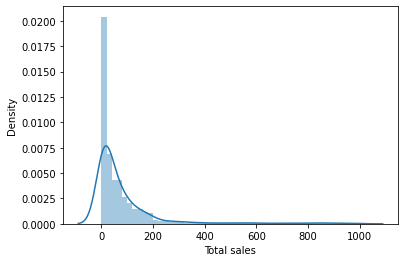

In [26]:
sns.distplot(agric_2017_gpd["Total sales"])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total sales', ylabel='Density'>

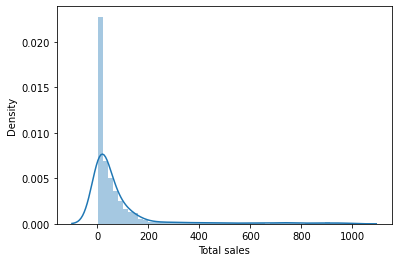

In [27]:
sns.distplot(agric_2007_gpd["Total sales"])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total sales', ylabel='Density'>

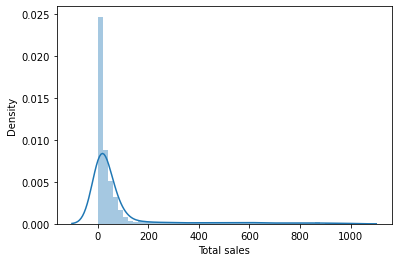

In [28]:
sns.distplot(agric_1997_gpd["Total sales"])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Precipitation (inches)', ylabel='Density'>

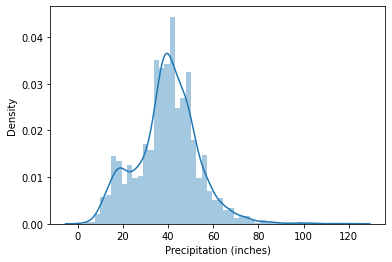

In [29]:
sns.distplot(precip_2017_gpd['Precipitation (inches)'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Precipitation (inches)', ylabel='Density'>

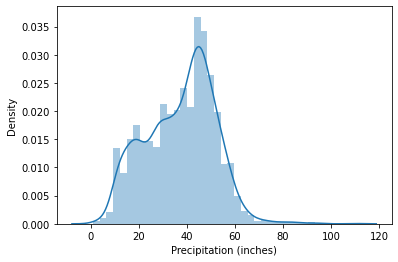

In [30]:
sns.distplot(precip_2007_gpd['Precipitation (inches)'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Precipitation (inches)', ylabel='Density'>

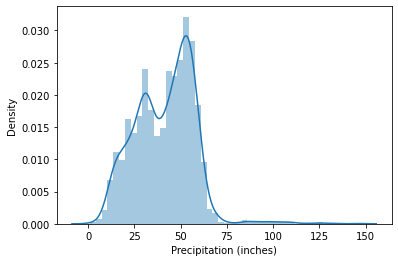

In [31]:
sns.distplot(precip_1997_gpd['Precipitation (inches)'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Temp (F)', ylabel='Density'>

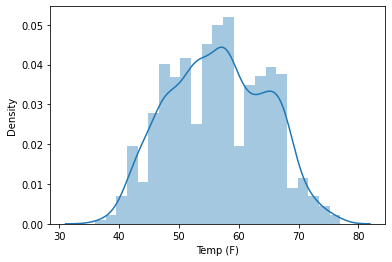

In [32]:
sns.distplot(temp_2017_gpd['Temp (F)'])

In [33]:
agric_2007_gpd["STATE_NAME"] = agric_2007_gpd["STATE_NAME"].str.lower()
agric_2007_gpd["STATE_NAME"] = agric_2007_gpd["STATE_NAME"].map(us_state_to_abbrev).fillna(agric_2007_gpd["State"])
agric_2017_gpd["STATE_NAME"] = agric_2017_gpd["STATE_NAME"].str.lower()
agric_2017_gpd["STATE_NAME"] = agric_2017_gpd["STATE_NAME"].map(us_state_to_abbrev).fillna(agric_2017_gpd["State"])
agric_1997_gpd["STATE_NAME"] = agric_1997_gpd["STATE_NAME"].str.lower()
agric_1997_gpd["STATE_NAME"] = agric_1997_gpd["STATE_NAME"].map(us_state_to_abbrev).fillna(agric_1997_gpd["State"])

In [34]:
data_2007 = precip_2007_gpd.merge(agric_2007_gpd,how='inner',left_on=['STATE_NAME','County'],right_on=["STATE_NAME","County"])
data_2007 = data_2007.merge(temp_2007_gpd,how='inner',left_on=['STATE_NAME','County'],right_on=["STATE_NAME","County"])
data_2017 = precip_2017_gpd.merge(agric_2017_gpd,how='inner',left_on=['STATE_NAME','County'],right_on=["STATE_NAME","County"])
data_2017 = data_2017.merge(temp_2017_gpd,how='inner',left_on=['STATE_NAME','County'],right_on=["STATE_NAME","County"])
data_1997 = precip_1997_gpd.merge(agric_1997_gpd,how='inner',left_on=['STATE_NAME','County'],right_on=["STATE_NAME","County"])
data_1997 = data_1997.merge(temp_1997_gpd,how='inner',left_on=['STATE_NAME','County'],right_on=["STATE_NAME","County"])

In [35]:
data_2007["year"] = 17
data_2017["year"] = 27
data_1997["year"] = 7

In [36]:
#sns.lineplot(data_2017['Precipitation (inches)'], data_2017['Total sales'])
#sns.lineplot(data_2007['Precipitation (inches)'],data_2007['Total sales'])
#sns.lineplot(data_1997['Precipitation (inches)'],data_1997['Total sales'])

In [37]:
all_data = pd.concat([data_2007,data_1997,data_2017])

In [38]:
all_data

,County,Precipitation (inches),State_x_x,ID_x,STATE_NAME,geometry_x,State_y_x,State,Total sales,geometry_y,Temp (F),State_x_y,ID_y,geometry,State_y_y,year
0,autauga,48,AL,001,AL,"MULTIPOLYGON (((-9674957.359 3845086.125, -967...",ALABAMA,ALABAMA,NaN,"MULTIPOLYGON (((-9674957.359 3845086.125, -967...",64,AL,001,"MULTIPOLYGON (((-9674957.359 3845086.125, -967...",ALABAMA,17
1,baldwin,48,AL,003,AL,"MULTIPOLYGON (((-9746791.638 3539792.693, -974...",ALABAMA,ALABAMA,80.0,"MULTIPOLYGON (((-9746791.638 3539792.693, -974...",67,AL,003,"MULTIPOLYGON (((-9746791.638 3539792.693, -974...",ALABAMA,17
2,barbour,40,AL,005,AL,"POLYGON ((-9490856.774 3782749.832, -9490916.2...",ALABAMA,ALABAMA,6.0,"POLYGON ((-9490856.774 3782749.832, -9490916.2...",65,AL,005,"POLYGON ((-9490856.774 3782749.832, -9490916.2...",ALABAMA,17
3,bibb,48,AL,007,AL,"POLYGON ((-9687675.653 3924884.737, -9687673.3...",ALABAMA,ALABAMA,NaN,"POLYGON ((-9687675.653 3924884.737, -9687673.3...",63,AL,007,"POLYGON ((-9687675.653 3924884.737, -9687673.3...",ALABAMA,17
4,blount,49,AL,009,AL,"MULTIPOLYGON (((-9666796.894 4022114.650, -966...",ALABAMA,ALABAMA,6.0,"MULTIPOLYGON (((-9666796.894 4022114.650, -966...",61,AL,009,"MULTIPOLYGON (((-9666796.894 4022114.650, -966...",ALABAMA,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2869,sweetwater,13,WY,037,WY,"POLYGON ((-12243736.690 5201445.939, -12242315...",WYOMING,WYOMING,4.0,"POLYGON ((-12243736.690 5201445.939, -12242315...",42,WY,037,"POLYGON ((-12243736.690 5201445.939, -12242315...",WYOMING,27
2870,teton,39,WY,039,WY,"MULTIPOLYGON (((-12267622.502 5515315.822, -12...",WYOMING,WYOMING,3.0,"MULTIPOLYGON (((-12267622.502 5515315.822, -12...",36,WY,039,"MULTIPOLYGON (((-12267622.502 5515315.822, -12...",WYOMING,27
2871,uinta,15,WY,041,WY,"POLYGON ((-12361566.034 5098248.722, -12361376...",WYOMING,WYOMING,3.0,"POLYGON ((-12361566.034 5098248.722, -12361376...",41,WY,041,"POLYGON ((-12361566.034 5098248.722, -12361376...",WYOMING,27
2872,washakie,15,WY,043,WY,"POLYGON ((-12080496.896 5491529.787, -12079643...",WYOMING,WYOMING,16.0,"POLYGON ((-12080496.896 5491529.787, -12079643...",46,WY,043,"POLYGON ((-12080496.896 5491529.787, -12079643...",WYOMING,27


In [39]:
#g = sns.lmplot(x="Precipitation (inches)", y = "Total sales",hue = "year",data=all_data)

# Time Series Prediction of Precipitation 2023

In [40]:
a1 = pd.read_csv('/kaggle/input/precipitation-data-for-counties-in-7-areas-in-us/Four Corners.csv',names=['Year','Val'])
a2 = pd.read_csv('/kaggle/input/precipitation-data-for-counties-in-7-areas-in-us/Great Lakes.csv',names=['Year','Val'])
a3 = pd.read_csv('/kaggle/input/precipitation-data-for-counties-in-7-areas-in-us/Great Plains.csv',names=['Year','Val'])
a4 = pd.read_csv('/kaggle/input/precipitation-data-for-counties-in-7-areas-in-us/Northeast.csv',names=['Year','Val','Throw_away'])
del a4["Throw_away"]
a5 = pd.read_csv('/kaggle/input/precipitation-data-for-counties-in-7-areas-in-us/PNW.csv',names=['Year','Val'])
a6 = pd.read_csv('/kaggle/input/precipitation-data-for-counties-in-7-areas-in-us/Rocky Mountains.csv',names=['Year','Val'])
a7 = pd.read_csv('/kaggle/input/precipitation-data-for-counties-in-7-areas-in-us/South.csv',names=['Year','Val','Throw_away'])
del a7["Throw_away"]
a8 = pd.read_csv('/kaggle/input/precipitation-data-for-counties-in-7-areas-in-us/West.csv',names=['Year','Val','Throw_away'])
del a8["Throw_away"]

In [41]:
a1["Year"]=a1["Year"].values.astype('str')
a2["Year"]=a2["Year"].values.astype('str')
a3["Year"]=a3["Year"].values.astype('str')
a4["Year"]=a4["Year"].values.astype('str')
a5["Year"]=a5["Year"].values.astype('str')
a6["Year"]=a6["Year"].values.astype('str')
a7["Year"]=a7["Year"].values.astype('str')
a8["Year"]=a8["Year"].values.astype('str')

In [42]:
n = {'Year':'202312', 'Val':26.7828}
a1 = a1.append(n,ignore_index=True)
n = {'Year':'202312', 'Val':32.280677}
a2 = a2.append(n,ignore_index=True)
n = {'Year':'202312', 'Val':28.368099}
a3 = a3.append(n,ignore_index=True)
n = {'Year':'202312', 'Val':44.169766 }
a4 = a4.append(n,ignore_index=True)
n = {'Year':'202312', 'Val':84.904844 }
a5 = a5.append(n,ignore_index=True)
n = {'Year':'202312', 'Val':25.649115}
a6 = a6.append(n,ignore_index=True)
n = {'Year':'202312', 'Val':32.78207}
a7 = a7.append(n,ignore_index=True)
n = {'Year':'202312', 'Val':21.997891}
a8 = a8.append(n,ignore_index=True)


In [43]:
a1["Year"] = a1["Year"].str[:-2]
a2["Year"] = a2["Year"].str[:-2]
a3["Year"] = a3["Year"].str[:-2]
a4["Year"] = a4["Year"].str[:-2]
a5["Year"] = a5["Year"].str[:-2]
a6["Year"] = a6["Year"].str[:-2]
a7["Year"] = a7["Year"].str[:-2]
a8["Year"] = a8["Year"].str[:-2]

In [44]:
a5 = a5.drop(index=0)

In [45]:
a1.Year=pd.to_datetime(a1.Year,format="%Y")
a2.Year=pd.to_datetime(a2.Year,format="%Y")
a3.Year=pd.to_datetime(a3.Year,format="%Y")
a4.Year=pd.to_datetime(a4.Year,format="%Y")
a5.Year=pd.to_datetime(a5.Year,format="%Y")
a6.Year=pd.to_datetime(a6.Year,format="%Y")
a7.Year=pd.to_datetime(a7.Year,format="%Y")
a8.Year=pd.to_datetime(a8.Year,format="%Y")

In [46]:
# a1.plot.scatter(x="Year",y="Val",figsize=(40,10)) 
#a1

In [47]:
#a5 = a5.drop(index=0)

In [48]:
a5['Val'] = a5['Val'].astype(float)


In [49]:
lr = a1.tail(1)
lr

,Year,Val
384,2023-01-01,26.7828


In [50]:
a1 = a1.groupby('Year')['Val'].agg(['mean']).reset_index()
a1.append(lr)
# fix the amount of rows taken into consideration as well here for the other data sets
a2 = a2.groupby('Year')['Val'].agg(['mean']).reset_index()
a3 = a3.groupby('Year')['Val'].agg(['mean']).reset_index()
a4 = a4.groupby('Year')['Val'].agg(['mean']).reset_index()
a5 = a5.groupby('Year')['Val'].agg(['mean']).reset_index()
a6 = a6.groupby('Year')['Val'].agg(['mean']).reset_index()
a7 = a7.groupby('Year')['Val'].agg(['mean']).reset_index()
a8 = a8.groupby('Year')['Val'].agg(['mean']).reset_index()


In [51]:
a1.index = a1["Year"]
del a1["Year"]
a1

,mean
Year,
1895-01-01,27.083333
1896-01-01,32.493333
1897-01-01,32.326667
1898-01-01,22.646667
1899-01-01,24.706667
...,...
2019-01-01,28.570000
2020-01-01,24.803333
2021-01-01,24.483333


In [52]:
agg = pd.read_csv('/kaggle/input/agricultural-output-by-state-time-series/85CFCA09-2C5B-3CA8-90A6-A5C86CCBBB8C.csv')

In [53]:
agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22483 entries, 0 to 22482
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Program           22483 non-null  object 
 1   Year              22483 non-null  int64  
 2   Period            22483 non-null  object 
 3   Week Ending       0 non-null      float64
 4   Geo Level         22483 non-null  object 
 5   State             22483 non-null  object 
 6   State ANSI        22481 non-null  float64
 7   Ag District       0 non-null      float64
 8   Ag District Code  0 non-null      float64
 9   County            0 non-null      float64
 10  County ANSI       0 non-null      float64
 11  Zip Code          0 non-null      float64
 12  Region            0 non-null      float64
 13  watershed_code    22483 non-null  int64  
 14  Watershed         0 non-null      float64
 15  Commodity         22483 non-null  object 
 16  Data Item         22483 non-null  object

In [54]:
agg = agg[['Year','State','Data Item', 'Domain','Domain Category','Value']]

In [55]:
agg["DataItem"] = agg["Data Item"]

In [56]:
agg = agg[agg['Domain']=="TOTAL"]
agg = agg[agg['DataItem'] == 'CROP TOTALS - SALES, MEASURED IN $']

In [57]:
a2.index = a2["Year"]
del a2["Year"]
a2

,mean
Year,
1895-01-01,25.613333
1896-01-01,32.843333
1897-01-01,30.343333
1898-01-01,32.640000
1899-01-01,32.410000
...,...
2019-01-01,39.210000
2020-01-01,32.483333
2021-01-01,35.676667


In [58]:
a3.index = a3["Year"]
del a3["Year"]
a3

,mean
Year,
1895-01-01,24.613333
1896-01-01,34.000000
1897-01-01,27.330000
1898-01-01,26.393333
1899-01-01,26.130000
...,...
2019-01-01,40.266667
2020-01-01,24.346667
2021-01-01,27.990000


In [59]:
a4.index = a4["Year"]
del a4["Year"]
a4

,mean
Year,
1895-01-01,35.220000
1896-01-01,42.490000
1897-01-01,44.456667
1898-01-01,47.503333
1899-01-01,42.960000
...,...
2019-01-01,53.533333
2020-01-01,52.473333
2021-01-01,47.033333


In [60]:
a5.index = a5["Year"]
del a5["Year"]
a5

,mean
Year,
1895-01-01,76.000000
1896-01-01,102.730000
1897-01-01,95.766667
1898-01-01,75.793333
1899-01-01,104.070000
...,...
2019-01-01,62.920000
2020-01-01,88.563333
2021-01-01,90.346667


In [61]:
a6.index = a6["Year"]
del a6["Year"]
a6

,mean
Year,
1895-01-01,26.013333
1896-01-01,32.916667
1897-01-01,32.490000
1898-01-01,22.010000
1899-01-01,26.466667
...,...
2019-01-01,26.746667
2020-01-01,25.603333
2021-01-01,23.260000


In [62]:
a7.index = a7["Year"]
del a7["Year"]
a7

,mean
Year,
1895-01-01,33.59500
1896-01-01,29.76000
1897-01-01,33.98500
1898-01-01,29.22000
1899-01-01,36.35000
...,...
2019-01-01,36.48000
2020-01-01,31.53000
2021-01-01,26.78500


In [63]:
a8.index = a8["Year"]
del a8["Year"]
a8

,mean
Year,
1895-01-01,20.650000
1896-01-01,28.836667
1897-01-01,21.293333
1898-01-01,13.353333
1899-01-01,24.396667
...,...
2019-01-01,26.846667
2020-01-01,12.360000
2021-01-01,18.756667


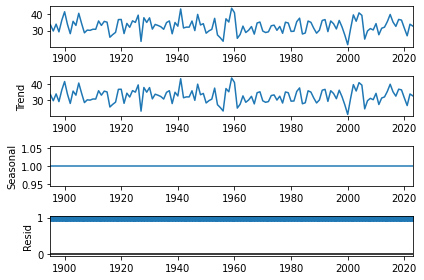

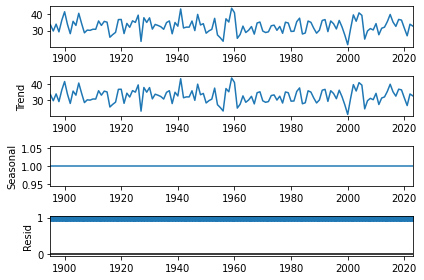

In [64]:
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(a7,model='multiplicative')
decomposed.plot()

These show that there is a lot of noise, and an increase in variation but no seasonality (because it is annual data) but surprisingly no trend. 

In [65]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(a1["mean"])
print('ADF Stastic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical Values:')
for key,value in result[4].items():
    print('\t%s: %.3f'%(key,value))
if result[0] < result[4]["5%"]:
    print("Reject Ho - Time Series is stationary")
else:
    print("Failed to reject Ho - Not stationary")

ADF Stastic: -10.387975
p-value: 0.000000
Critical Values:
	1%: -3.483
	5%: -2.884
	10%: -2.579
Reject Ho - Time Series is stationary


/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


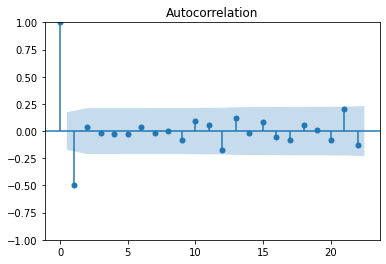

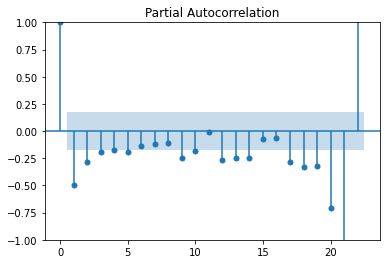

In [66]:
# finding p-values 

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(a1["mean"].diff().dropna())
plot_pacf(a1["mean"].diff().dropna())
plt.show()

#p: 1,2,17,18,19,20,21,22
#

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


plotting ARIMA model
                               SARIMAX Results                                
Dep. Variable:                   mean   No. Observations:                  129
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -340.314
Date:                Mon, 27 Mar 2023   AIC                            688.627
Time:                        20:50:11   BIC                            700.066
Sample:                    01-01-1895   HQIC                           693.275
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.7352      0.353     75.699      0.000      26.043      27.427
ar.L1          0.3584      1.057      0.339      0.735      -1.714       2.431
ma.L1         -0.2774      1.07

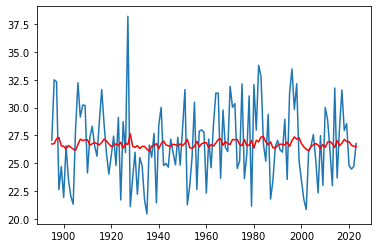

In [67]:
# p = 1
# q = 1
# d =0 
# from statsmodels.tsa.arima.model import ARIMA
# model = ARIMA(a1['mean'][:96].diff(),order=(1,0,1))
# model_fit = model.fit()

# plt.plot(a1['mean'].diff())
# plt.plot(model_fit.fittedvalues,color='red')
# print('plotting ARIMA model')
# print(model_fit.summary())

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(a1['mean'],order=(1,0,1))
model_fit = model.fit()

plt.plot(a1['mean'])
plt.plot(model_fit.fittedvalues,color='red')
print('plotting ARIMA model')
print(model_fit.summary())



plotting ARIMA model
                               SARIMAX Results                                
Dep. Variable:                   mean   No. Observations:                  129
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -340.314
Date:                Mon, 27 Mar 2023   AIC                            688.627
Time:                        20:50:12   BIC                            700.066
Sample:                    01-01-1895   HQIC                           693.275
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.7352      0.353     75.699      0.000      26.043      27.427
ar.L1          0.3584      1.057      0.339      0.735      -1.714       2.431
ma.L1         -0.2774      1.07

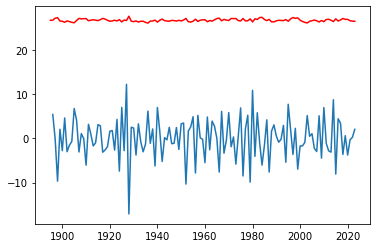

In [68]:
plt.plot(a1['mean'].diff())
plt.plot(model_fit.fittedvalues,color='red')
print('plotting ARIMA model')
print(model_fit.summary())

In [69]:
#a1
model_fit.fittedvalues
#predicted precipitation for last year is 26.514427

Year
1895-01-01    26.735214
1896-01-01    26.764117
1897-01-01    27.210309
1898-01-01    27.319743
1899-01-01    26.566360
                ...    
2019-01-01    26.947833
2020-01-01    26.942736
2021-01-01    26.636380
2022-01-01    26.525489
2023-01-01    26.514427
Length: 129, dtype: float64

In [70]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(a2["mean"])
print('ADF Stastic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical Values:')
for key,value in result[4].items():
    print('\t%s: %.3f'%(key,value))
if result[0] < result[4]["5%"]:
    print("Reject Ho - Time Series is stationary")
else:
    print("Failed to reject Ho - Not stationary")

ADF Stastic: -4.719075
p-value: 0.000077
Critical Values:
	1%: -3.483
	5%: -2.885
	10%: -2.579
Reject Ho - Time Series is stationary


/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


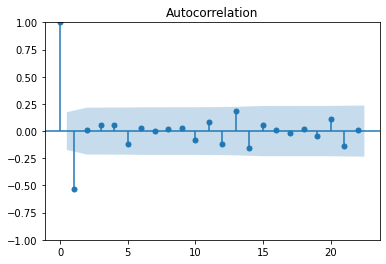

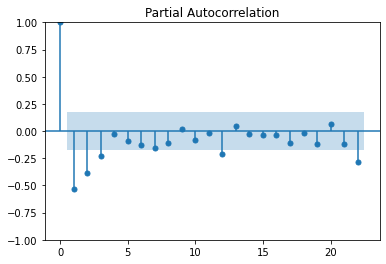

In [71]:
# finding p-values 

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(a2["mean"].diff().dropna())
plot_pacf(a2["mean"].diff().dropna())
plt.show()

#p: 1,2,3
#q : 1

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


plotting ARIMA model
                               SARIMAX Results                                
Dep. Variable:                   mean   No. Observations:                  129
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -329.844
Date:                Mon, 27 Mar 2023   AIC                            667.688
Time:                        20:50:13   BIC                            679.127
Sample:                    01-01-1895   HQIC                           672.336
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0307      0.009      3.299      0.001       0.012       0.049
ar.L1         -0.0284      0.098     -0.290      0.772      -0.220       0.164
ma.L1         -1.0000     34.55

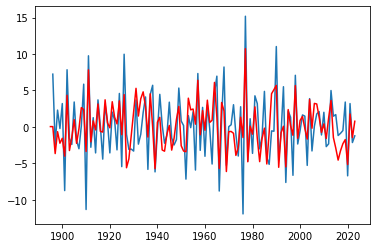

In [72]:
# p = 1
# q = 1
# d =0 
# from statsmodels.tsa.arima.model import ARIMA
# model = ARIMA(a1['mean'][:96].diff(),order=(1,0,1))
# model_fit = model.fit()

# plt.plot(a1['mean'].diff())
# plt.plot(model_fit.fittedvalues,color='red')
# print('plotting ARIMA model')
# print(model_fit.summary())

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(a2['mean'].diff(),order=(1,0,1))
model_fit = model.fit()

plt.plot(a2['mean'].diff())
plt.plot(model_fit.fittedvalues,color='red')
print('plotting ARIMA model')
print(model_fit.summary())



In [73]:
#a2
model_fit.fittedvalues
# prediction is 33.977177

Year
1895-01-01    0.030744
1896-01-01    0.030744
1897-01-01   -3.671037
1898-01-01   -0.670813
1899-01-01   -2.248791
                ...   
2019-01-01   -1.747840
2020-01-01   -5.174911
2021-01-01    1.761943
2022-01-01   -1.479121
2023-01-01    0.765069
Length: 129, dtype: float64

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


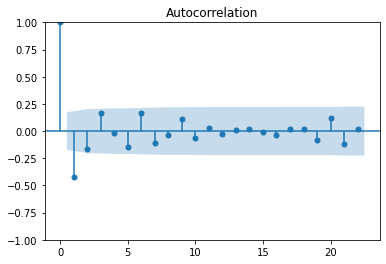

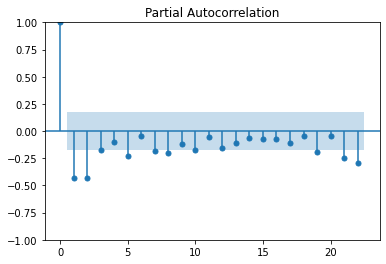

In [74]:
# finding p-values 

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(a3["mean"].diff().dropna())
plot_pacf(a3["mean"].diff().dropna())
plt.show()

#p: 1,2,3
#q : 1

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


plotting ARIMA model
                               SARIMAX Results                                
Dep. Variable:                   mean   No. Observations:                  129
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -392.081
Date:                Mon, 27 Mar 2023   AIC                            792.162
Time:                        20:50:14   BIC                            803.601
Sample:                    01-01-1895   HQIC                           796.810
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.3661      0.516     54.986      0.000      27.355      29.377
ar.L1         -0.4019      0.580     -0.693      0.488      -1.539       0.735
ma.L1          0.5316      0.55

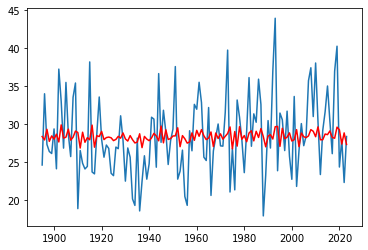

In [75]:
# p = 1
# q = 1
# d =0 
# from statsmodels.tsa.arima.model import ARIMA
# model = ARIMA(a1['mean'][:96].diff(),order=(1,0,1))
# model_fit = model.fit()

# plt.plot(a1['mean'].diff())
# plt.plot(model_fit.fittedvalues,color='red')
# print('plotting ARIMA model')
# print(model_fit.summary())

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(a3['mean'],order=(1,0,1))
model_fit = model.fit()

plt.plot(a3['mean'])
plt.plot(model_fit.fittedvalues,color='red')
print('plotting ARIMA model')
print(model_fit.summary())



In [76]:
#a3
model_fit.fittedvalues
# prediction is 27.326068

Year
1895-01-01    28.366063
1896-01-01    27.918555
1897-01-01    29.316829
1898-01-01    27.727918
1899-01-01    28.449731
                ...    
2019-01-01    29.602846
2020-01-01    29.252174
2021-01-01    27.373688
2022-01-01    28.844815
2023-01-01    27.326068
Length: 129, dtype: float64

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


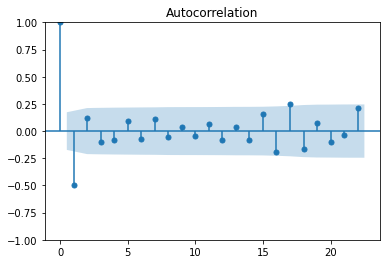

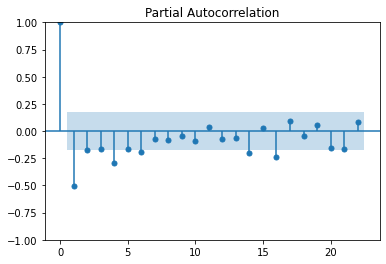

In [77]:
# finding p-values 

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(a4["mean"].diff().dropna())
plot_pacf(a4["mean"].diff().dropna())
plt.show()

#p: 1,2,3
#q : 1

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


plotting ARIMA model
                               SARIMAX Results                                
Dep. Variable:                   mean   No. Observations:                  129
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -386.876
Date:                Mon, 27 Mar 2023   AIC                            781.753
Time:                        20:50:16   BIC                            793.192
Sample:                    01-01-1895   HQIC                           786.401
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0408      0.026      1.596      0.111      -0.009       0.091
ar.L1          0.0956      0.104      0.922      0.357      -0.108       0.299
ma.L1         -0.9678      0.04

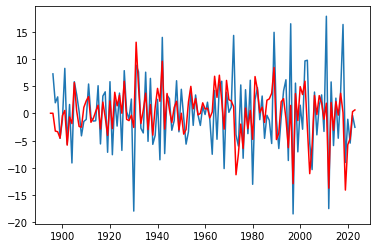

In [78]:
# p = 1
# q = 1
# d =0 
# from statsmodels.tsa.arima.model import ARIMA
# model = ARIMA(a1['mean'][:96].diff(),order=(1,0,1))
# model_fit = model.fit()

# plt.plot(a1['mean'].diff())
# plt.plot(model_fit.fittedvalues,color='red')
# print('plotting ARIMA model')
# print(model_fit.summary())

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(a4['mean'].diff(),order=(1,0,1))
model_fit = model.fit()

plt.plot(a4['mean'].diff())
plt.plot(model_fit.fittedvalues,color='red')
print('plotting ARIMA model')
print(model_fit.summary())



In [79]:
#a4
model_fit.fittedvalues
# prediction is 45.456955

Year
1895-01-01     0.040829
1896-01-01     0.040829
1897-01-01    -3.225706
1898-01-01    -3.347121
1899-01-01    -4.540874
                ...    
2019-01-01   -14.060771
2020-01-01    -5.739043
2021-01-01    -4.592775
2022-01-01     0.336564
2023-01-01     0.653363
Length: 129, dtype: float64

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


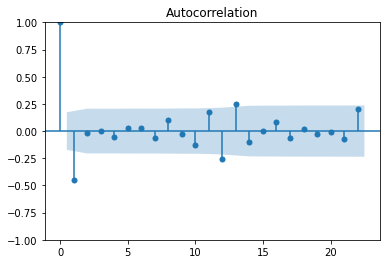

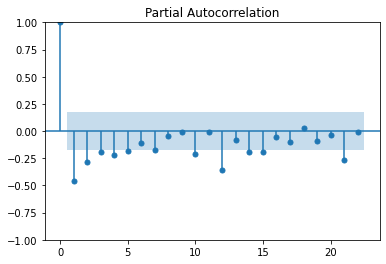

In [80]:
# finding p-values 

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(a5["mean"].diff().dropna())
plot_pacf(a5["mean"].diff().dropna())
plt.show()

#p: 1,2,3,4,12
#q : 1

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


plotting ARIMA model
                               SARIMAX Results                                
Dep. Variable:                   mean   No. Observations:                  129
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -506.320
Date:                Mon, 27 Mar 2023   AIC                           1020.641
Time:                        20:50:17   BIC                           1032.080
Sample:                    01-01-1895   HQIC                          1025.289
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0280      0.036      0.775      0.438      -0.043       0.099
ar.L1          0.1294      0.104      1.249      0.212      -0.074       0.332
ma.L1         -0.9999      7.07

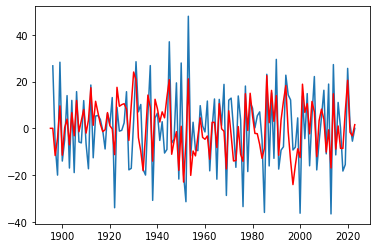

In [81]:
# p = 1
# q = 1
# d =0 
# from statsmodels.tsa.arima.model import ARIMA
# model = ARIMA(a1['mean'][:96].diff(),order=(1,0,1))
# model_fit = model.fit()

# plt.plot(a1['mean'].diff())
# plt.plot(model_fit.fittedvalues,color='red')
# print('plotting ARIMA model')
# print(model_fit.summary())

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(a5['mean'].diff(),order=(1,0,1))
model_fit = model.fit()

plt.plot(a5['mean'].diff())
plt.plot(model_fit.fittedvalues,color='red')
print('plotting ARIMA model')
print(model_fit.summary())



In [82]:
#a5
model_fit.fittedvalues
# prediction is 85.046282

Year
1895-01-01     0.027999
1896-01-01     0.027999
1897-01-01   -11.595652
1898-01-01    -4.103936
1899-01-01     9.616678
                ...    
2019-01-01     7.264820
2020-01-01    20.584861
2021-01-01    -1.676314
2022-01-01    -3.177364
2023-01-01     1.588559
Length: 129, dtype: float64

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


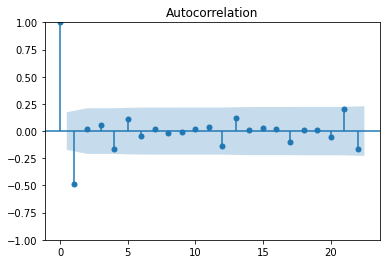

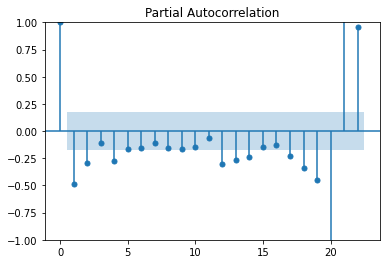

In [83]:
# finding p-values 

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(a6["mean"].diff().dropna())
plot_pacf(a6["mean"].diff().dropna())
plt.show()

#p: 1,2,3
#q : 1

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


plotting ARIMA model
                               SARIMAX Results                                
Dep. Variable:                   mean   No. Observations:                  129
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -348.774
Date:                Mon, 27 Mar 2023   AIC                            705.548
Time:                        20:50:18   BIC                            716.987
Sample:                    01-01-1895   HQIC                           710.196
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.6510      0.372     69.012      0.000      24.922      26.379
ar.L1          0.3161      0.960      0.329      0.742      -1.565       2.197
ma.L1         -0.2228      0.97

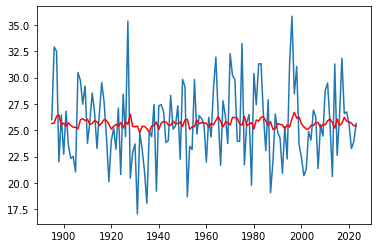

In [84]:
# p = 1
# q = 1
# d =0 
# from statsmodels.tsa.arima.model import ARIMA
# model = ARIMA(a1['mean'][:96].diff(),order=(1,0,1))
# model_fit = model.fit()

# plt.plot(a1['mean'].diff())
# plt.plot(model_fit.fittedvalues,color='red')
# print('plotting ARIMA model')
# print(model_fit.summary())

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(a6['mean'],order=(1,0,1))
model_fit = model.fit()

plt.plot(a6['mean'])
plt.plot(model_fit.fittedvalues,color='red')
print('plotting ARIMA model')
print(model_fit.summary())



In [85]:
#a6
model_fit.fittedvalues
# prediction is 25.440934

Year
1895-01-01    25.650956
1896-01-01    25.685530
1897-01-01    26.337146
1898-01-01    26.441822
1899-01-01    25.487577
                ...    
2019-01-01    25.867839
2020-01-01    25.801490
2021-01-01    25.680059
2022-01-01    25.434421
2023-01-01    25.440934
Length: 129, dtype: float64

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


plotting ARIMA model
                               SARIMAX Results                                
Dep. Variable:                   mean   No. Observations:                  129
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -368.270
Date:                Mon, 27 Mar 2023   AIC                            744.539
Time:                        20:50:19   BIC                            755.979
Sample:                    01-01-1895   HQIC                           749.187
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.7822      0.435     75.440      0.000      31.931      33.634
ar.L1         -0.1363      0.572     -0.238      0.812      -1.257       0.984
ma.L1          0.2708      0.57

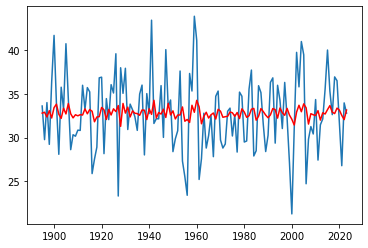

In [86]:
# p = 1
# q = 1
# d =0 
# from statsmodels.tsa.arima.model import ARIMA
# model = ARIMA(a1['mean'][:96].diff(),order=(1,0,1))
# model_fit = model.fit()

# plt.plot(a1['mean'].diff())
# plt.plot(model_fit.fittedvalues,color='red')
# print('plotting ARIMA model')
# print(model_fit.summary())

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(a7['mean'],order=(1,0,1))
model_fit = model.fit()

plt.plot(a7['mean'])
plt.plot(model_fit.fittedvalues,color='red')
print('plotting ARIMA model')
print(model_fit.summary())



In [87]:
#a7
model_fit.fittedvalues
# prediction is 33.138507

Year
1895-01-01    32.782227
1896-01-01    32.887550
1897-01-01    32.348388
1898-01-01    33.061411
1899-01-01    32.227575
                ...    
2019-01-01    33.351996
2020-01-01    33.125241
2021-01-01    32.520943
2022-01-01    32.046443
2023-01-01    33.138507
Length: 129, dtype: float64

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


plotting ARIMA model
                               SARIMAX Results                                
Dep. Variable:                   mean   No. Observations:                  129
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -399.699
Date:                Mon, 27 Mar 2023   AIC                            807.399
Time:                        20:50:19   BIC                            818.838
Sample:                    01-01-1895   HQIC                           812.047
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.9916      0.608     36.147      0.000      20.799      23.184
ar.L1          0.5773      0.740      0.780      0.435      -0.873       2.027
ma.L1         -0.5035      0.77

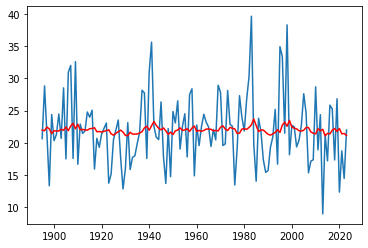

In [88]:
# p = 1
# q = 1
# d =0 
# from statsmodels.tsa.arima.model import ARIMA
# model = ARIMA(a1['mean'][:96].diff(),order=(1,0,1))
# model_fit = model.fit()

# plt.plot(a1['mean'].diff())
# plt.plot(model_fit.fittedvalues,color='red')
# print('plotting ARIMA model')
# print(model_fit.summary())

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(a8['mean'],order=(1,0,1))
model_fit = model.fit()

plt.plot(a8['mean'])
plt.plot(model_fit.fittedvalues,color='red')
print('plotting ARIMA model')
print(model_fit.summary())



In [89]:
#a8
model_fit.fittedvalues
# prediction is 21.167662

Year
1895-01-01    21.991559
1896-01-01    21.886998
1897-01-01    22.451640
1898-01-01    22.171323
1899-01-01    21.443508
                ...    
2019-01-01    21.765058
2020-01-01    22.236095
2021-01-01    21.403341
2022-01-01    21.456502
2023-01-01    21.167662
Length: 129, dtype: float64

# Using the predicted precipitation to predict agriculture output

In [90]:
all_data

,County,Precipitation (inches),State_x_x,ID_x,STATE_NAME,geometry_x,State_y_x,State,Total sales,geometry_y,Temp (F),State_x_y,ID_y,geometry,State_y_y,year
0,autauga,48,AL,001,AL,"MULTIPOLYGON (((-9674957.359 3845086.125, -967...",ALABAMA,ALABAMA,NaN,"MULTIPOLYGON (((-9674957.359 3845086.125, -967...",64,AL,001,"MULTIPOLYGON (((-9674957.359 3845086.125, -967...",ALABAMA,17
1,baldwin,48,AL,003,AL,"MULTIPOLYGON (((-9746791.638 3539792.693, -974...",ALABAMA,ALABAMA,80.0,"MULTIPOLYGON (((-9746791.638 3539792.693, -974...",67,AL,003,"MULTIPOLYGON (((-9746791.638 3539792.693, -974...",ALABAMA,17
2,barbour,40,AL,005,AL,"POLYGON ((-9490856.774 3782749.832, -9490916.2...",ALABAMA,ALABAMA,6.0,"POLYGON ((-9490856.774 3782749.832, -9490916.2...",65,AL,005,"POLYGON ((-9490856.774 3782749.832, -9490916.2...",ALABAMA,17
3,bibb,48,AL,007,AL,"POLYGON ((-9687675.653 3924884.737, -9687673.3...",ALABAMA,ALABAMA,NaN,"POLYGON ((-9687675.653 3924884.737, -9687673.3...",63,AL,007,"POLYGON ((-9687675.653 3924884.737, -9687673.3...",ALABAMA,17
4,blount,49,AL,009,AL,"MULTIPOLYGON (((-9666796.894 4022114.650, -966...",ALABAMA,ALABAMA,6.0,"MULTIPOLYGON (((-9666796.894 4022114.650, -966...",61,AL,009,"MULTIPOLYGON (((-9666796.894 4022114.650, -966...",ALABAMA,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2869,sweetwater,13,WY,037,WY,"POLYGON ((-12243736.690 5201445.939, -12242315...",WYOMING,WYOMING,4.0,"POLYGON ((-12243736.690 5201445.939, -12242315...",42,WY,037,"POLYGON ((-12243736.690 5201445.939, -12242315...",WYOMING,27
2870,teton,39,WY,039,WY,"MULTIPOLYGON (((-12267622.502 5515315.822, -12...",WYOMING,WYOMING,3.0,"MULTIPOLYGON (((-12267622.502 5515315.822, -12...",36,WY,039,"MULTIPOLYGON (((-12267622.502 5515315.822, -12...",WYOMING,27
2871,uinta,15,WY,041,WY,"POLYGON ((-12361566.034 5098248.722, -12361376...",WYOMING,WYOMING,3.0,"POLYGON ((-12361566.034 5098248.722, -12361376...",41,WY,041,"POLYGON ((-12361566.034 5098248.722, -12361376...",WYOMING,27
2872,washakie,15,WY,043,WY,"POLYGON ((-12080496.896 5491529.787, -12079643...",WYOMING,WYOMING,16.0,"POLYGON ((-12080496.896 5491529.787, -12079643...",46,WY,043,"POLYGON ((-12080496.896 5491529.787, -12079643...",WYOMING,27


In [91]:
all_data.drop(["State_x_x", "ID_x", "State_y_y", "State_x_x", "geometry_x","geometry_y"],axis=1,inplace=True)
all_data.rename(columns = {'Precipitation (inches)':'precip', 'Temp (F)': 'temp' }, inplace = True)
all_data.drop(["ID_y","State_x_y","State_y_x"],axis=1,inplace=True)

In [92]:
all_data

,County,precip,STATE_NAME,State,Total sales,temp,geometry,year
0,autauga,48,AL,ALABAMA,NaN,64,"MULTIPOLYGON (((-9674957.359 3845086.125, -967...",17
1,baldwin,48,AL,ALABAMA,80.0,67,"MULTIPOLYGON (((-9746791.638 3539792.693, -974...",17
2,barbour,40,AL,ALABAMA,6.0,65,"POLYGON ((-9490856.774 3782749.832, -9490916.2...",17
3,bibb,48,AL,ALABAMA,NaN,63,"POLYGON ((-9687675.653 3924884.737, -9687673.3...",17
4,blount,49,AL,ALABAMA,6.0,61,"MULTIPOLYGON (((-9666796.894 4022114.650, -966...",17
...,...,...,...,...,...,...,...,...
2869,sweetwater,13,WY,WYOMING,4.0,42,"POLYGON ((-12243736.690 5201445.939, -12242315...",27
2870,teton,39,WY,WYOMING,3.0,36,"MULTIPOLYGON (((-12267622.502 5515315.822, -12...",27
2871,uinta,15,WY,WYOMING,3.0,41,"POLYGON ((-12361566.034 5098248.722, -12361376...",27
2872,washakie,15,WY,WYOMING,16.0,46,"POLYGON ((-12080496.896 5491529.787, -12079643...",27


In [93]:
all_data[['precip', 'Total sales']].groupby(['precip'], as_index=False).mean().sort_values(by='Total sales', ascending=True)


,precip,Total sales
111,131,1.000000
90,91,1.000000
105,110,1.000000
99,104,2.000000
112,134,2.000000
...,...,...
110,125,413.000000
85,86,431.333333
113,146,465.000000
0,1,648.000000


In [94]:
all_data['Total sales'].mean()

81.07114671768504

In [95]:
us_state_to_abbrev = {value:key for key, value in us_state_to_abbrev.items()}
us_state_to_abbrev

{'AL': 'alabama',
 'AK': 'alaska',
 'AZ': 'arizona',
 'AR': 'arkansas',
 'CA': 'california',
 'CO': 'colorado',
 'CT': 'connecticut',
 'DE': 'delaware',
 'FL': 'florida',
 'GA': 'georgia',
 'HI': 'hawaii',
 'ID': 'idaho',
 'IL': 'illinois',
 'IN': 'indiana',
 'IA': 'iowa',
 'KS': 'kansas',
 'KY': 'kentucky',
 'LA': 'louisiana',
 'ME': 'maine',
 'MD': 'maryland',
 'MA': 'massachusetts',
 'MI': 'michigan',
 'MN': 'minnesota',
 'MS': 'mississippi',
 'MO': 'missouri',
 'MT': 'montana',
 'NE': 'nebraska',
 'NV': 'nevada',
 'NH': 'new hampshire',
 'NJ': 'new jersey',
 'NM': 'new mexico',
 'NY': 'new york',
 'NC': 'north carolina',
 'ND': 'north dakota',
 'OH': 'ohio',
 'OK': 'oklahoma',
 'OR': 'oregon',
 'PA': 'pennsylvania',
 'RI': 'rhode island',
 'SC': 'south carolina',
 'SD': 'south dakota',
 'TN': 'tennessee',
 'TX': 'texas',
 'UT': 'utah',
 'VT': 'vermont',
 'VA': 'virginia',
 'WA': 'washington',
 'WV': 'west virginia',
 'WI': 'wisconsin',
 'WY': 'wyoming',
 'DC': 'district of columbia

In [96]:

us_state_to_abbrev = {'AL': 1,
 'AK': 2,
 'AZ': 3,
 'AR': 4,
 'CA': 5,
 'CO': 6,
 'CT': 7,
 'DE': 8,
 'FL': 9,
 'GA': 10,
 'HI': 11,
 'ID': 12,
 'IL': 13,
 'IN': 14,
 'IA': 15,
 'KS': 16,
 'KY': 17,
 'LA': 18,
 'ME': 19,
 'MD': 20,
 'MA': 21,
 'MI': 22,
 'MN': 23,
 'MS': 24,
 'MO': 25,
 'MT': 26,
 'NE': 27,
 'NV': 28,
 'NH': 29,
 'NJ': 30,
 'NM': 31,
 'NY': 32,
 'NC': 33,
 'ND': 34,
 'OH': 35,
 'OK': 36,
 'OR': 38,
 'PA': 39,
 'RI': 40,
 'SC': 41,
 'SD': 42,
 'TN': 43,
 'TX': 44,
 'UT': 45,
 'VT': 46,
 'VA': 47,
 'WA': 49,
 'WV': 50,
 'WI': 51,
 'WY': 52,
 'DC': 53,  }


In [97]:
all_data = all_data.replace({"STATE_NAME":us_state_to_abbrev})


In [98]:
from sklearn import cluster

In [99]:
km8 = cluster.KMeans(n_clusters=8,random_state=42)
km8cls = km8.fit(all_data[['precip']])
all_data['Region'] = km8cls.labels_

In [100]:
from geopandas import GeoDataFrame
all_data = GeoDataFrame(all_data)

/opt/conda/lib/python3.7/site-packages/geopandas/plotting.py:640: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,


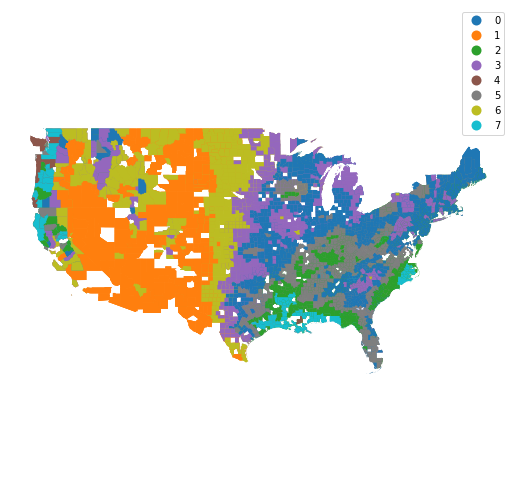

In [101]:

f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including a legend and with no boundary lines
all_data.plot(column='Region', categorical=True, legend=True, linewidth=0, axes=ax)
# Remove axis
ax.set_axis_off()
# Keep axes proportionate
plt.axis('equal')
# Display the map
plt.show()

In [102]:
all_data.reset_index(drop=True,inplace=True)
numerical_all_data = all_data[["precip","STATE_NAME","Total sales","temp","year","Region"]]

In [103]:
all_data

,County,precip,STATE_NAME,State,Total sales,temp,geometry,year,Region
0,autauga,48,1,ALABAMA,NaN,64,"MULTIPOLYGON (((-9674957.359 3845086.125, -967...",17,5
1,baldwin,48,1,ALABAMA,80.0,67,"MULTIPOLYGON (((-9746791.638 3539792.693, -974...",17,5
2,barbour,40,1,ALABAMA,6.0,65,"POLYGON ((-9490856.774 3782749.832, -9490916.2...",17,0
3,bibb,48,1,ALABAMA,NaN,63,"POLYGON ((-9687675.653 3924884.737, -9687673.3...",17,5
4,blount,49,1,ALABAMA,6.0,61,"MULTIPOLYGON (((-9666796.894 4022114.650, -966...",17,5
...,...,...,...,...,...,...,...,...,...
8613,sweetwater,13,52,WYOMING,4.0,42,"POLYGON ((-12243736.690 5201445.939, -12242315...",27,1
8614,teton,39,52,WYOMING,3.0,36,"MULTIPOLYGON (((-12267622.502 5515315.822, -12...",27,0
8615,uinta,15,52,WYOMING,3.0,41,"POLYGON ((-12361566.034 5098248.722, -12361376...",27,1
8616,washakie,15,52,WYOMING,16.0,46,"POLYGON ((-12080496.896 5491529.787, -12079643...",27,1


In [104]:
#sns.pairplot(numerical_all_data,hue='year')

In [105]:
#sns.heatmap(numerical_all_data.corr(),annot=True,vmin=-1,vmax=1)

In [106]:
#sns.scatterplot(all_data["precip"], all_data["Total sales"], hue=all_data["year"])


In [107]:
#sns.scatterplot(all_data["temp"], all_data["Total sales"], hue=all_data["year"])


In [108]:
#sns.catplot(x="precip",y="Total sales",data=all_data,col='year',hue='year')

In [109]:
train = all_data.where(all_data["year"] != 27)
test = all_data.where(all_data["year"] == 27)
# I split it up so that the modele can learn how to predict something that has a time
train = train.dropna()
test = test.dropna()
train = train.drop(["County","geometry","State"],axis=1)
test = test.drop(["County","geometry","State"],axis=1)

In [110]:
train

,precip,STATE_NAME,Total sales,temp,year,Region
1,48.0,1.0,80.0,67.0,17.0,5.0
2,40.0,1.0,6.0,65.0,17.0,0.0
4,49.0,1.0,6.0,61.0,17.0,5.0
5,41.0,1.0,27.0,64.0,17.0,0.0
6,44.0,1.0,2.0,64.0,17.0,0.0
...,...,...,...,...,...,...
5739,9.0,52.0,1.0,42.0,7.0,1.0
5740,51.0,52.0,1.0,34.0,7.0,5.0
5741,13.0,52.0,562.0,40.0,7.0,1.0
5742,12.0,52.0,13.0,42.0,7.0,1.0


In [111]:
def norm_rmse(rmse):
    return rmse / (all_data["Total sales"].max() - all_data["Total sales"].min())

In [112]:
all_data["Total sales"].median()

26.0

In [113]:
X_train = train.drop("Total sales",axis=1)
X_test = test.drop("Total sales", axis=1)
y_train = train["Total sales"]
y_test = test["Total sales"]

In [114]:
from sklearn.metrics import mean_squared_error
import math

In [115]:
from sklearn import linear_model
Ridge_reg = linear_model.Ridge(alpha=.5)
Ridge_reg.fit(X_train, y_train)
y_pred = Ridge_reg.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
 
RMSE_ridge = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(norm_rmse(RMSE_ridge))

Root Mean Square Error:

0.1444924813566728


In [116]:
from sklearn import linear_model
Lasso_reg = linear_model.Lasso(alpha=0.1)
Lasso_reg.fit(X_train,y_train)

y_pred = Lasso_reg.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
 
RMSE_lasso = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(norm_rmse(RMSE_lasso))

Root Mean Square Error:

0.14449031906270912


In [117]:
from sklearn import linear_model
BayesianRidge_reg = linear_model.BayesianRidge()
BayesianRidge_reg.fit(X_train,y_train)
y_pred = BayesianRidge_reg.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
 
RMSE_BR = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(norm_rmse(RMSE_BR))

Root Mean Square Error:

0.14439365810475513


In [118]:
from sklearn import svm
svm_regr = svm.SVR()
svm_regr.fit(X_train, y_train)
y_pred = svm_regr.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
 
RMSE_SVM = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(norm_rmse(RMSE_SVM))

Root Mean Square Error:

0.15403334228082624


In [119]:
from sklearn import tree

tree_reg = tree.DecisionTreeRegressor()
tree_reg = tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
 
RMSE_tree = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(norm_rmse(RMSE_tree))

Root Mean Square Error:

0.1922939886512487


In [120]:
from sklearn import neighbors
from math import sqrt
min = 1000000 #to store rmse values for different k
best_k = 0
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    # IDEAL value is 5

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    
    if norm_rmse(error) < min:
        min = norm_rmse(error)
    best_k = K
    
print(best_k,min)
# the trend is that the more trees there are, the lower the root mean square. I will just use 100 because it 

20 0.14761494859909502


In [121]:
X_train
#27 is 2017 
# 33 is 2023

,precip,STATE_NAME,temp,year,Region
1,48.0,1.0,67.0,17.0,5.0
2,40.0,1.0,65.0,17.0,0.0
4,49.0,1.0,61.0,17.0,5.0
5,41.0,1.0,64.0,17.0,0.0
6,44.0,1.0,64.0,17.0,0.0
...,...,...,...,...,...
5739,9.0,52.0,42.0,7.0,1.0
5740,51.0,52.0,34.0,7.0,5.0
5741,13.0,52.0,40.0,7.0,1.0
5742,12.0,52.0,42.0,7.0,1.0


In [122]:
predictor_for_2023 = [
    [85.046282,49,58,33,4],#PNW
    [21.167662,5,51.4,33,5], #West
    [25.440934,12,44.9,33,1], #RM
    [26.514427,3,43.5,33, 2], #Four Corners
    [27.326068,42,54.9, 33,7], # Great Plains
    [33.977177,16,54.6, 33,6], # Great Lakes
    [33.138507,43,72, 33,0], # South
    [45.456955,39,70, 33,3], # Northeast
]
# For more accurate predictions, we should have known about this clustering from the begginning and picked counties that were in these areas, instead of making our own 
#Because we culdn't find agriculture time series, we decided to take this route and need to predict by area the agriculture output

predictor_for_2023 = pd.DataFrame(predictor_for_2023, columns=['precip','STATE_NAME','temp','year','Region'])

In [123]:
import xgboost as xg
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    xgb_r = xg.XGBRegressor(
                  n_estimators = K)

    xgb_r.fit(X_train, y_train)
    y_pred = xgb_r.predict(X_test)
    error = sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', norm_rmse(error))

# K = 5 

RMSE value for k=  1 is: 0.15388756424403607
RMSE value for k=  2 is: 0.14769974530396257
RMSE value for k=  3 is: 0.14499591891344077
RMSE value for k=  4 is: 0.14322984032486288
RMSE value for k=  5 is: 0.1427101962132904
RMSE value for k=  6 is: 0.1427291071672153
RMSE value for k=  7 is: 0.14294180058946
RMSE value for k=  8 is: 0.14314783944236265
RMSE value for k=  9 is: 0.1432433789601043
RMSE value for k=  10 is: 0.14356776200309238
RMSE value for k=  11 is: 0.14350865068530497
RMSE value for k=  12 is: 0.14357287858163664
RMSE value for k=  13 is: 0.14348869813530005
RMSE value for k=  14 is: 0.14345568173120982
RMSE value for k=  15 is: 0.14371821740334406
RMSE value for k=  16 is: 0.1435818193737802
RMSE value for k=  17 is: 0.1436305871522065
RMSE value for k=  18 is: 0.14365286063478533
RMSE value for k=  19 is: 0.14371732240717885
RMSE value for k=  20 is: 0.14375949302857607


In [124]:
all_data["Total sales"].min()

1.0

In [125]:
xgb_r = xg.XGBRegressor(n_estimators = 5)
xgb_r.fit(X_train, y_train)
x = xgb_r.predict(predictor_for_2023)

In [126]:
y = BayesianRidge_reg.predict(predictor_for_2023)

In [127]:
x

array([ 75.15607 ,  81.86036 ,  71.61652 , 129.58559 ,  50.2361  ,
        64.92061 ,  38.894794,  24.144207], dtype=float32)

In [128]:
y

array([78.3327882 , 93.3465453 , 84.98179263, 88.43356865, 79.0693973 ,
       90.83601794, 88.80864701, 90.14618898])

Next steps: normalize data, find better, more predictive features

In [129]:
(x+y)/2

array([ 76.74442755,  87.60345225,  78.29915819, 109.0095776 ,
        64.65274827,  77.87831323,  63.85172074,  57.14519799])

In [130]:
a1

,mean
Year,
1895-01-01,27.083333
1896-01-01,32.493333
1897-01-01,32.326667
1898-01-01,22.646667
1899-01-01,24.706667
...,...
2019-01-01,28.570000
2020-01-01,24.803333
2021-01-01,24.483333


In [131]:
129*8

1032

In [132]:
23+100+5-1

127